Innovative Assignment for the Deep Learning course prepared by 
Aashna Shah (21bce267)
Shrutam Shah (21bce273)
Krisha Thakkar (21bce301)
Vivek Vanera (21bce313)

The dataset used here is trafficCAM (https://arxiv.org/abs/2211.09620). The model determines the amount of time required at an intersection depending on the amount of traffic there is in the lane. A traffic flow formula is used that accounts for the amount of two wheelers, LMVs and HMVs, and the weather. 

The model is constructed using the pretrained ResNET50 model and some custom layers. 

In [1]:
dataset_path = '/kaggle/input/dl-innovative/Fully_annotate'

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [3]:
# Function to extract image and JSON file paths and city name
height = []
width = []
height_all = []
width_all = []
def extract_paths(folder_path):
    image_paths = []
    json_paths = []
    city_names = []
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                image_path = os.path.join(root, file)
                json_path = os.path.join(root, file.split('.')[0] + '.json')
                city_name = os.path.basename(root)
                city_name = city_name.split('_')[0]
                
                image = img.imread(image_path)
                h, w, _ = image.shape
                height_all.append(h)
                width_all.append(w)
                if h == 1080:
                    height.append(h)
                    width.append(w)
                    image_paths.append(image_path)
                    json_paths.append(json_path)
                    city_names.append(city_name)
    return image_paths, json_paths, city_names

# Extract paths
image_paths, json_paths, city_names = extract_paths(dataset_path)

# Create a DataFrame
data = {'image_path': image_paths, 'json_path': json_paths, 'city': city_names}
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

                                          image_path  \
0  /kaggle/input/dl-innovative/Fully_annotate/Noi...   
1  /kaggle/input/dl-innovative/Fully_annotate/Noi...   
2  /kaggle/input/dl-innovative/Fully_annotate/Noi...   
3  /kaggle/input/dl-innovative/Fully_annotate/Noi...   
4  /kaggle/input/dl-innovative/Fully_annotate/Noi...   

                                           json_path   city  
0  /kaggle/input/dl-innovative/Fully_annotate/Noi...  Noida  
1  /kaggle/input/dl-innovative/Fully_annotate/Noi...  Noida  
2  /kaggle/input/dl-innovative/Fully_annotate/Noi...  Noida  
3  /kaggle/input/dl-innovative/Fully_annotate/Noi...  Noida  
4  /kaggle/input/dl-innovative/Fully_annotate/Noi...  Noida  


In [5]:
df.shape

(1530, 3)

In [6]:
print((df.iloc[2]['image_path'],df.iloc[2]['json_path']))

('/kaggle/input/dl-innovative/Fully_annotate/Noida_1650521289.1884022/frame48.jpg', '/kaggle/input/dl-innovative/Fully_annotate/Noida_1650521289.1884022/frame48.json')


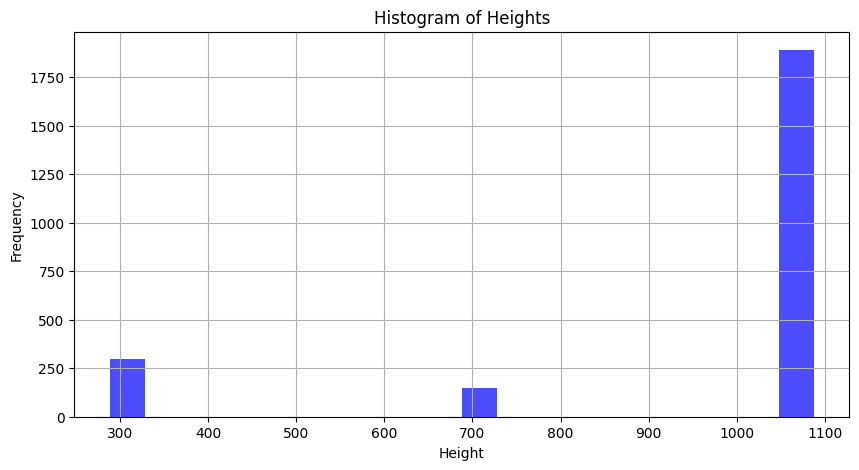

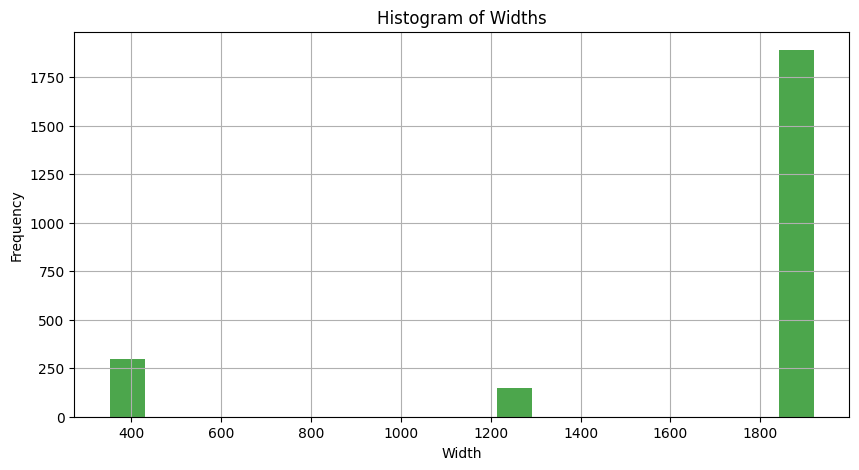

In [7]:
# Plot histogram for heights
plt.figure(figsize=(10, 5))
plt.hist(height_all, bins=20, color='blue', alpha=0.7)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Heights')
plt.grid(True)
plt.show()

# Plot histogram for widths
plt.figure(figsize=(10, 5))
plt.hist(width_all, bins=20, color='green', alpha=0.7)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Widths')
plt.grid(True)
plt.show()

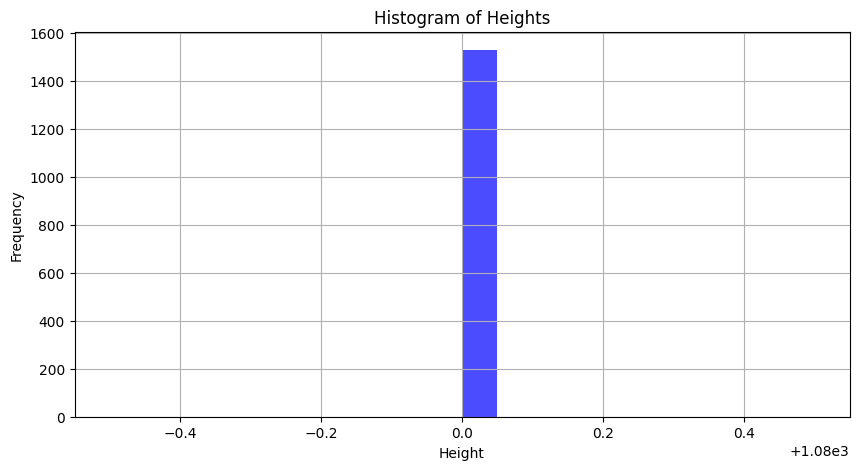

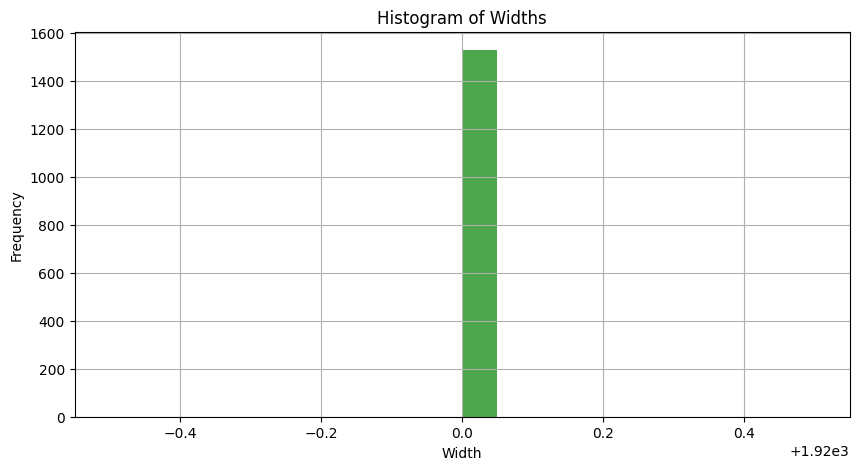

In [8]:
# Plot histogram for heights
plt.figure(figsize=(10, 5))
plt.hist(height, bins=20, color='blue', alpha=0.7)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Heights')
plt.grid(True)
plt.show()

# Plot histogram for widths
plt.figure(figsize=(10, 5))
plt.hist(width, bins=20, color='green', alpha=0.7)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Widths')
plt.grid(True)
plt.show()

In [9]:
import json

json_file_path = "/kaggle/input/dl-innovative/Fully_annotate/Noida_1650521289.1884022/frame48.json"

try:
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)
        if 'shapes' in data:
            shapes_data = data['shapes']
            #print("Shapes data:")
            #print(shapes_data)
except FileNotFoundError:
    print("File not found. Please check the file path.")
except json.JSONDecodeError:
    print("JSON decoding error. Please check if the file contains valid JSON.")
except Exception as e:
    print("An error occurred:", e)

(1920, 1080)


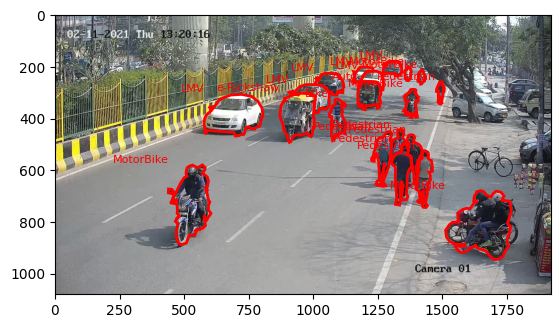

In [10]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = df.iloc[2]['image_path']
image = Image.open(image_path)
print(image.size)
# Load JSON data
json_file_path = df.iloc[2]['json_path']
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)
    if 'shapes' in data:
            shapes = data['shapes']
            #print("Shapes data:")
            #print(shapes)

# Extract shapes data
#shapes = data.get('shapes', [])

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Plot each shape on the image
for shape in shapes:
    label = shape.get('label', '')
    points = shape.get('points', [])
    if points:
        # Convert points to list of tuples
        points = [(point[0], point[1]) for point in points]
        # Create a polygon patch
        poly = patches.Polygon(points, linewidth=2, edgecolor='r', facecolor='none')
        # Add the patch to the axes
        ax.add_patch(poly)
        # Add label if available
        if label:
            x, y = zip(*points)
            ax.text(min(x), min(y), label, color='r', fontsize=8, ha='right', va='bottom')

# Show the plot
plt.show()

(398, 224)


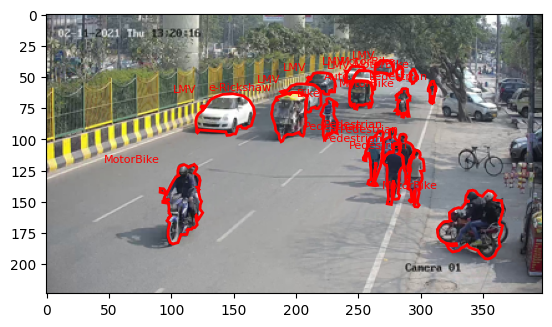

In [11]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = df.iloc[2]['image_path']
image = Image.open(image_path)

# Load JSON data
json_file_path = df.iloc[2]['json_path']
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)
    if 'shapes' in data:
        shapes = data['shapes']

# Resize the image to 224x224
resized_image = image.resize((int(0.2075*image.size[0]), int(0.2075*image.size[1])))

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the resized image
ax.imshow(resized_image)

# Get the original image size
original_width, original_height = image.size
resized_width, resized_height = resized_image.size
print(resized_image.size)

# Scale factor for resizing coordinates
scale_x = resized_width / original_width
scale_y = resized_height / original_height

# Plot each shape on the resized image
for shape in shapes:
    label = shape.get('label', '')
    points = shape.get('points', [])
    if points:
        # Convert points to list of tuples and scale coordinates
        scaled_points = [(point[0] * scale_x, point[1] * scale_y) for point in points]
        # Create a polygon patch
        poly = patches.Polygon(scaled_points, linewidth=2, edgecolor='r', facecolor='none')
        # Add the patch to the axes
        ax.add_patch(poly)
        # Add label if available
        if label:
            x, y = zip(*scaled_points)
            ax.text(min(x), min(y), label, color='r', fontsize=8, ha='right', va='bottom')

# Show the plot
plt.show()


In [12]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 97132, done.
remote: Counting objects: 100% (412/412), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 97132 (delta 233), reused 361 (delta 212), pack-reused 96720
Receiving objects: 100% (97132/97132), 611.14 MiB | 42.03 MiB/s, done.
Resolving deltas: 100% (70651/70651), done.


In [13]:
import os
os.chdir('models/research')
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

Processing /kaggle/working/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 53.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 47

In [14]:
def points_to_bounding_box(points):
    #extract x and y coordinates
    x_coordinates = [point[0] for point in points]
    y_coordinates = [point[1] for point in points]

    #find min and max coordinates
    min_x = min(x_coordinates)
    max_x = max(x_coordinates)
    min_y = min(y_coordinates)
    max_y = max(y_coordinates)

    #construct bounding box
    bounding_box = [0.2075*min_x, 0.2075*min_y, 0.2075*max_x, 0.2075*max_y]

    return bounding_box

def json_to_bounding_boxes(row):
    with open(row['json_path'], 'r') as json_file:
        json_data = json.load(json_file)
    
    bounding_boxes = []
    for object_data in json_data['shapes']:
        label = object_data['label']
        points = object_data['points']
        bounding_box = points_to_bounding_box(points)
        bounding_boxes.append({'label': label, 'bounding_box': bounding_box})
    return bounding_boxes

df['object_data'] = df.apply(json_to_bounding_boxes, axis=1)

In [15]:
print(df['object_data'].iloc[0])

[{'label': 'Pedestrian', 'bounding_box': [273.25124069478903, 104.09468438538205, 287.2562034739454, 128.72037377476235]}, {'label': 'Pedestrian', 'bounding_box': [243.60347985347985, 100.0469702132493, 258.05224862992304, 148.44230769230768]}, {'label': 'Pedestrian', 'bounding_box': [258.6529304029304, 99.68238213399503, 273.4036544850498, 149.98697270471462]}, {'label': 'Pedestrian', 'bounding_box': [262.28411910669973, 113.79032258064515, 283.03411910669973, 161.36600496277916]}, {'label': 'Pedestrian', 'bounding_box': [273.25124069478903, 104.09468438538205, 287.2562034739454, 128.72037377476235]}, {'label': 'Pedestrian', 'bounding_box': [283.00640750847043, 115.43266242384772, 298.9679459700089, 163.1117216117216]}, {'label': 'LMV', 'bounding_box': [84.02609890109889, 72.85555555555554, 142.36805555555554, 113.14513888888887]}, {'label': 'MotorBike', 'bounding_box': [198.53087478559178, 67.98027444253859, 214.04888507718698, 99.97727272727272]}, {'label': 'LMV', 'bounding_box': [1

In [16]:
print(df)

                                             image_path  \
0     /kaggle/input/dl-innovative/Fully_annotate/Noi...   
1     /kaggle/input/dl-innovative/Fully_annotate/Noi...   
2     /kaggle/input/dl-innovative/Fully_annotate/Noi...   
3     /kaggle/input/dl-innovative/Fully_annotate/Noi...   
4     /kaggle/input/dl-innovative/Fully_annotate/Noi...   
...                                                 ...   
1525  /kaggle/input/dl-innovative/Fully_annotate/BLR...   
1526  /kaggle/input/dl-innovative/Fully_annotate/BLR...   
1527  /kaggle/input/dl-innovative/Fully_annotate/BLR...   
1528  /kaggle/input/dl-innovative/Fully_annotate/BLR...   
1529  /kaggle/input/dl-innovative/Fully_annotate/BLR...   

                                              json_path   city  \
0     /kaggle/input/dl-innovative/Fully_annotate/Noi...  Noida   
1     /kaggle/input/dl-innovative/Fully_annotate/Noi...  Noida   
2     /kaggle/input/dl-innovative/Fully_annotate/Noi...  Noida   
3     /kaggle/input/dl-inno

(398, 224)


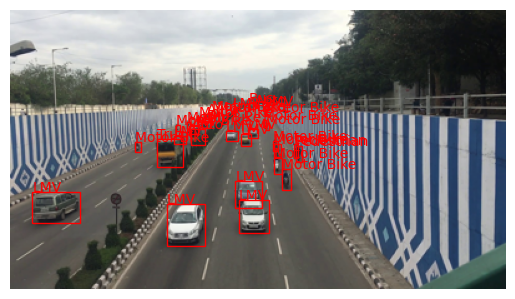

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_bounding_boxes(image_path, bounding_boxes):
    image = Image.open(image_path)
    image = image.resize((int(0.2075*image.size[0]), int(0.2075*image.size[1])))
    print(image.size)
    plt.imshow(image)
    ax = plt.gca()

    for bbox in bounding_boxes:
        label = bbox['label']
        xmin, ymin, xmax, ymax = bbox['bounding_box']
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(xmin, ymin, label, color='r')

    plt.axis('off')
    plt.show()

data = df['object_data'].iloc[50]
image_path = df['image_path'].iloc[50]
plot_bounding_boxes(image_path, data)

In [20]:
#.................................................................................................................................................................
#Uncomment if the one below doesn't work
#.................................................................................................................................................................

# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Define constants
# # IMAGE_SIZE = (224, 224)

# # Assuming you have a DataFrame called df with a column 'image_path' containing paths to images
# # and a column 'annotations' containing bounding box annotations

# # Step 1: Data Augmentation and Loading
# def preprocess_image(image_path, annotations):
#     # Load and resize image
#     image = load_img(image_path)
#     image = image.resize((int(0.2075*image.size[0]), int(0.2075*image.size[1])))
#     image_array = img_to_array(image)

#     # Normalize pixel values to [0, 1]
#     image_array = image_array / 255.0

#     # Process annotations
#     # You may need additional preprocessing steps here depending on your annotations format
#     # For simplicity, let's assume annotations are already in the required format
    
#     return image_array, annotations

# # Apply preprocessing to all images in the DataFrame
# X = []
# y = []

# for index, row in df.iterrows():
#     image_path = row['image_path']
#     annotations = row['object_data']
    
#     image_array, annotations = preprocess_image(image_path, annotations)
#     X.append(image_array)
#     y.append(annotations)

# # Find the maximum number of objects in any annotation
# max_objects = max(len(ann) for ann in y)

# # Pad annotations with fewer objects to match the maximum number
# for i in range(len(y)):
#     while len(y[i]) < max_objects:
#         y[i].append({'label': ''})  # Padding with empty objects for labels only

# # Convert lists to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Step 2: Splitting the Dataset
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#step 1: Data Augmentation and Loading
def preprocess_image(image_path, annotations):
    image = load_img(image_path)
    image = image.resize((int(0.2075*image.size[0]), int(0.2075*image.size[1])))
    image_array = img_to_array(image)
    image_array = image_array / 255.0
    return image_array, annotations

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


X_augmented = []
y_augmented = []

for index, row in df.iterrows():
    image_path = row['image_path']
    annotations = row['object_data']
    
    image_array, annotations = preprocess_image(image_path, annotations)
    X_augmented.append(image_array)
    y_augmented.append(annotations)

    #apply data augmentation
    image_array = image_array.reshape((1,) + image_array.shape) #reshape for flow method
    num_augmentations = 2  #you can adjust the number of augmentations as needed
    i = 0
    for batch in datagen.flow(image_array, batch_size=1):
        if i >= num_augmentations:
            break
        X_augmented.append(batch[0])
        y_augmented.append(annotations)  #annotations remain the same for augmented images
        i += 1

#find the maximum number of objects in any annotation
max_objects = max(len(ann) for ann in y_augmented)

#pad annotations with fewer objects to match the maximum number
for i in range(len(y_augmented)):
    while len(y_augmented[i]) < max_objects:
        y_augmented[i].append({'label': ''})  #padding with empty objects for labels only

#convert lists to numpy arrays
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

#step 2: split the dataset
X_train, X_val, y_train, y_val = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)


In [22]:
print(max_objects)

100


In [23]:
print(X_train[0])

[[[0.9607843  0.9372549  0.9372549 ]
  [0.9607843  0.9372549  0.9372549 ]
  [0.9607843  0.9372549  0.9372549 ]
  ...
  [0.04691632 0.05893018 0.0562683 ]
  [0.05582024 0.05882353 0.05882353]
  [0.05885987 0.05885987 0.05885987]]

 [[0.9593142  0.9369424  0.9357848 ]
  [0.95907897 0.9372549  0.9343818 ]
  [0.9599734  0.93838465 0.9345034 ]
  ...
  [0.05363828 0.05910882 0.05637355]
  [0.05934409 0.05934409 0.05934409]
  [0.05971397 0.05971397 0.05971397]]

 [[0.9576812  0.9355862  0.93142086]
  [0.95901054 0.93856794 0.93010116]
  [0.9612407  0.94163287 0.9314067 ]
  ...
  [0.06334594 0.06334594 0.06334594]
  [0.0627451  0.0627451  0.06281416]
  [0.0627451  0.0627451  0.0639063 ]]

 ...

 [[0.32156864 0.3019608  0.2784314 ]
  [0.32156864 0.3019608  0.2784314 ]
  [0.32156864 0.3019608  0.2784314 ]
  ...
  [0.33653936 0.43137255 0.38039216]
  [0.32950118 0.43137255 0.38039216]
  [0.3259374  0.42789817 0.37691778]]

 [[0.32156864 0.3019608  0.2784314 ]
  [0.32156864 0.3019608  0.2784314 ]


In [24]:
print(y_train[0])

[{'label': 'LMV', 'bounding_box': [133.6025943396226, 152.98231132075472, 161.00825471698113, 182.6391509433962]}
 {'label': 'LMV', 'bounding_box': [170.8082284138675, 126.32884191098475, 189.6719387755102, 144.4877551020408]}
 {'label': 'MotorBike', 'bounding_box': [194.81479599426837, 122.33832113898788, 204.19719918333442, 136.44432773109241]}
 {'label': 'MotorBike', 'bounding_box': [185.6489795918367, 122.71357805671917, 191.66224489795917, 136.05582805671915]}
 {'label': 'MotorBike', 'bounding_box': [192.99086714044284, 114.0280033920011, 198.4649370389772, 126.38865291262135]}
 {'label': 'MotorBike', 'bounding_box': [212.79323803276228, 105.52819449452161, 217.43200575359106, 115.03201128841475]}
 {'label': 'LMV', 'bounding_box': [181.58578873467886, 107.4120020592986, 194.67053701015962, 119.5910740203193]}
 {'label': 'Truck', 'bounding_box': [163.23333333333332, 100.3512238471517, 174.90068698524746, 118.32325581395347]}
 {'label': 'LMV', 'bounding_box': [176.7714998990947, 94.

In [25]:
import pandas as pd
all_labels = [label['label'] for entry in df['object_data'] for label in entry if entry]
unique_labels = set(all_labels)
num_classes = len(unique_labels)
print("Number of classes:", num_classes)
print(unique_labels)

Number of classes: 14
{'', 'Pedestrian', 'e-Rickshaw', 'LCV', 'Auto', 'LMV', 'Bike', 'Pesestrian', 'Bus', 'Tractor', 'Truck', 'MotorBike', 'Motor Bike', 'Moterbike'}


In [27]:
#step 3: data preparation
label_encoder = LabelEncoder()

unique_labels_array = np.array(list(unique_labels))
label_encoder.fit(unique_labels_array)

class_id_to_number = {label: number for number, label in enumerate(label_encoder.classes_)}
number_to_class_id = {number: label for label, number in class_id_to_number.items()}

y_train_labels = np.array([[label_encoder.transform([obj['label']])[0] for obj in annotation] for annotation in y_train])
y_val_labels = np.array([[label_encoder.transform([obj['label']])[0] for obj in annotation] for annotation in y_val])
y_train_one_hot = np.zeros((len(y_train_labels), max_objects, num_classes))
for i, labels in enumerate(y_train_labels):
    for j, label in enumerate(labels):
        y_train_one_hot[i, j, label] = 1

y_val_one_hot = np.zeros((len(y_val_labels), max_objects, num_classes))
for i, labels in enumerate(y_val_labels):
    for j, label in enumerate(labels):
        y_val_one_hot[i, j, label] = 1

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_one_hot))

batch_size = 8
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

In [28]:
print(class_id_to_number)

{'': 0, 'Auto': 1, 'Bike': 2, 'Bus': 3, 'LCV': 4, 'LMV': 5, 'Moterbike': 6, 'Motor Bike': 7, 'MotorBike': 8, 'Pedestrian': 9, 'Pesestrian': 10, 'Tractor': 11, 'Truck': 12, 'e-Rickshaw': 13}


In [29]:
print(number_to_class_id)

{0: '', 1: 'Auto', 2: 'Bike', 3: 'Bus', 4: 'LCV', 5: 'LMV', 6: 'Moterbike', 7: 'Motor Bike', 8: 'MotorBike', 9: 'Pedestrian', 10: 'Pesestrian', 11: 'Tractor', 12: 'Truck', 13: 'e-Rickshaw'}


In [30]:
print(unique_labels_array)

['' 'Pedestrian' 'e-Rickshaw' 'LCV' 'Auto' 'LMV' 'Bike' 'Pesestrian' 'Bus'
 'Tractor' 'Truck' 'MotorBike' 'Motor Bike' 'Moterbike']


In [31]:
print(y_train_labels[1])

[ 8  8  8 13  5 13  8 13  5  9  9  9  9  9  9  9  9  5  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [32]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train_labels, num_classes)
y_val_one_hot = tf.keras.utils.to_categorical(y_val_labels, num_classes)

In [33]:
print(y_val_one_hot.shape[1])

100


In [34]:
#working
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.layers import Conv2D, Flatten, Dense
# from tensorflow.keras.models import Model

# backbone = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 398, 3))
# backbone.trainable = False

# x = Flatten()(backbone.output)
# x = Dense(1024, activation='relu')(x)
# class_output = Dense(100, activation='sigmoid', name='class_output')(x)

# model = Model(inputs=backbone.input, outputs=class_output)

# # Step 6: Model Compilation and Training
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# #model.summary()

# model.fit(train_dataset, epochs=10, validation_data=val_dataset)
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Reshape, LeakyReLU, Dropout, Activation
from tensorflow.keras.activations import gelu
from tensorflow.keras.models import Model
from keras.optimizers import SGD
from tensorflow.keras import regularizers

# Load pre-trained ResNet50 model
backbone = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 398, 3))
backbone.trainable = False

for layer in backbone.layers[-5:]:
    layer.trainable = True
# Flatten the output of ResNet50 and add a dense layer
x = Flatten()(backbone.output)
#x = Dense(4096, activation='relu')(x)
#x = Dense(2048, activation='relu')(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(256, activation='relu')(x)
x = Dense(1024, kernel_regularizer=regularizers.l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
#x = Activation(gelu)(x)
#x = Dropout(0.2)(x)
x = Dense(256, kernel_regularizer=regularizers.l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dense(128,activation = 'relu')(x)

max_objects = 100  #Maximum possible number of objects
num_classes = 14   #Total number of unique object classes

output_shape = (max_objects, num_classes)
x = Dense(output_shape[0] * output_shape[1], activation='sigmoid')(x)
x = Reshape(output_shape)(x)

#class_output = Dense(num_classes, activation='softmax', name='class_output')(x)

# Define the model
model = Model(inputs=backbone.input, outputs=x)

model.compile(optimizer=SGD(learning_rate=0.03, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=50, validation_data=val_dataset)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
I0000 00:00:1714061862.218742     161 service.cc:145] XLA service 0x78d8c401c0f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714061862.218783     161 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/459 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.1034 - loss: 5.0877   

I0000 00:00:1714061875.686299     161 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


459/459 ━━━━━━━━━━━━━━━━━━━━ 54s 66ms/step - accuracy: 0.6141 - loss: 3.3521 - val_accuracy: 0.6883 - val_loss: 2.1978
Epoch 2/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7016 - loss: 1.9900 - val_accuracy: 0.7228 - val_loss: 1.5236
Epoch 3/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7259 - loss: 1.4071 - val_accuracy: 0.7351 - val_loss: 1.1431
Epoch 4/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7413 - loss: 1.0634 - val_accuracy: 0.7411 - val_loss: 0.9114
Epoch 5/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7484 - loss: 0.8782 - val_accuracy: 0.7552 - val_loss: 0.7892
Epoch 6/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7590 - loss: 0.7533 - val_accuracy: 0.7575 - val_loss: 0.7351
Epoch 7/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7619 - loss: 0.7001 - val_accuracy: 0.7620 - val_loss: 0.6832
Epoch 8/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7634 - loss: 0.6695 - val_accurac

In [36]:
print(X_val[0].shape)

(224, 398, 3)


In [37]:
predictions = model.predict(X_val)

29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 260ms/step


In [38]:
max_indices = []

for prediction in predictions:
    max_indices.append([row.argmax() for row in prediction])
    
print(len(max_indices))

918


In [39]:
print(max_indices[0])

[9, 9, 9, 8, 5, 8, 5, 5, 5, 5, 5, 5, 8, 5, 5, 8, 8, 5, 8, 5, 5, 8, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [40]:
print(y_val[0])

[{'label': 'Pedestrian', 'bounding_box': [263.90612244897954, 148.8674405223325, 272.62325071896794, 172.7217712309939]}
 {'label': 'Pedestrian', 'bounding_box': [238.160447761194, 128.3196517412935, 245.84152001447052, 140.20714234746316]}
 {'label': 'Pedestrian', 'bounding_box': [235.90992414664981, 130.47267653065717, 241.7335651074589, 141.201816859355]}
 {'label': 'LMV', 'bounding_box': [11.79535001762558, 152.33931579852157, 49.59025270758122, 174.68424153549952]}
 {'label': 'Bus', 'bounding_box': [84.32145345596433, 107.93412068004459, 129.7453316610925, 146.84037068004457]}
 {'label': 'MotorBike', 'bounding_box': [88.19328316610924, 107.8706580414246, 98.19024672886228, 115.93543536935984]}
 {'label': 'MotorBike', 'bounding_box': [74.26118962388445, 120.65969995276805, 80.2050146667661, 132.29820767146444]}
 {'label': 'MotorBike', 'bounding_box': [125.86782786885243, 97.56386612021858, 129.2411202185792, 104.70730874316938]}
 {'label': 'MotorBike', 'bounding_box': [123.26626016

In [41]:
class_labels = [number_to_class_id[number] for number in max_indices[0]]
print(class_labels)

['Pedestrian', 'Pedestrian', 'Pedestrian', 'MotorBike', 'LMV', 'MotorBike', 'LMV', 'LMV', 'LMV', 'LMV', 'LMV', 'LMV', 'MotorBike', 'LMV', 'LMV', 'MotorBike', 'MotorBike', 'LMV', 'MotorBike', 'LMV', 'LMV', 'MotorBike', 'LMV', 'LMV', 'LMV', 'LMV', 'LMV', 'LMV', 'MotorBike', 'MotorBike', 'MotorBike', 'MotorBike', 'MotorBike', 'MotorBike', 'MotorBike', 'LMV', 'MotorBike', 'MotorBike', 'LMV', 'LMV', 'LMV', 'LMV', 'LMV', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [42]:
vehicle_count = {}

for vehicle in class_labels:
    if vehicle != '':
        if vehicle in vehicle_count:
            vehicle_count[vehicle] += 1
        else:
            vehicle_count[vehicle] = 1

print(vehicle_count)

{'Pedestrian': 3, 'MotorBike': 16, 'LMV': 24}


In [45]:
total_count = sum(count for vehicle, count in vehicle_count.items() if vehicle != 'Pedestrian')

print(total_count)

40


In [47]:
temperature_settings = {
    "normal": {
        "max_time": 60,
        "Li": 3,
        "h": 1
    },
    "sunny": {
        "max_time": 30,
        "Li": 1,
        "h": 1
    },
    "monsoon": {
        "max_time": 60,
        "h": 1.5
    },
    "winter": {
        "max_time": 60,
        "h": 1
    }
}


In [1]:
weather = input("Enter the weather:")
if weather in temperature_settings:
    settings = temperature_settings[weather]
    max_time = settings.get("max_time", 60)
    Li = settings.get("Li", 1)  # Default to 1 if "Li" is not available
    h = settings.get("h", 1)   # Default to 1 if "h" is not available
    total_time = min(max_time, Li + total_count * h)
    print("Total time:", total_time)
else:
    print("Weather not found in settings.")

Enter the weather: sunny


NameError: name 'Li' is not defined

In [49]:
print(total_time)

43


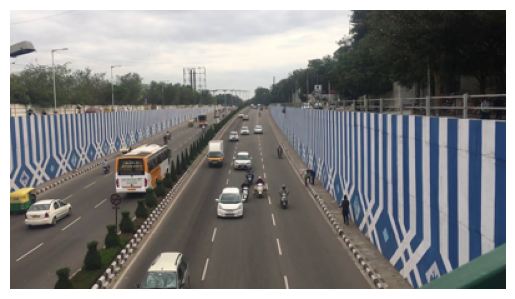

In [43]:
import matplotlib.pyplot as plt

# Assuming X_val is a NumPy array containing image data
first_image = X_val[0]

# Reshape the image to its original shape if it's flattened
# For example, if the original shape is (28, 28), reshape it to (28, 28)
# If it's already in the correct shape, this step is not necessary
# Replace (28, 28) with the appropriate shape of your image
# first_image = first_image.reshape((28, 28))

# Display the image
plt.imshow(first_image, cmap='gray')
plt.axis('off')
plt.show()